In [1]:
import numpy as np
import matlab.engine
import math

mle = matlab.engine.start_matlab('-desktop')

In [16]:
mle.quit()

In [3]:
STOP_TIME = 35
START_TIME = 5

In [18]:
#how to call
tunableParams = {
    'current_height': 1000.0,
    'current_vel':260.0,
    'current_pitch':0.0,
    'extension_length':0.02543
}

results = mle.sim_the_model('Stoptime',STOP_TIME,"StartTime",START_TIME,'TunableParameters',tunableParams)

In [4]:
def getApogee(result_matlab):
    velocity_data = result_matlab['velocity']['Data']
    velocity_time = result_matlab['velocity']['Time']
    height_data = result_matlab['height']['Data']
    height_time = result_matlab['height']['Time']

    #find time when apogee hit
    apogee_index = -1
    for i in range(0,len(velocity_data)):
        if (velocity_data[i][0]<=0 and i>1):
            apogee_index = i
            break
            
    if (apogee_index != -1):
        #find time when apogee hit
        apogee_time = velocity_time[apogee_index][0]
        return height_data[apogee_index][0]
    else:
        return -1 #INVALID APOGEE
    

In [20]:
print(get_extension(260.0,1000.0,TARGET_APOG))
print(getApogee(results))

curr apogee w no extension = 3617.452393475059
0
3616.289624015507


In [41]:
print(type(260.0))

<class 'float'>


In [29]:
#No airbrake deployment
#max height: 7092m
#height at burn out: 1500m
#vel at burnout: 620m/s


23751 entries
vel: 260 -> 0
height: 700 -> 3400
extension: 0.0 -> 0.025 (lookup table in int percentage)

(261 x 91) lookup table

__  |  h   700 730 760 ... 3400
v
260
259
258
.
.
.
0

mini version: (27 x 25)
____  h   4700 4800 4900 ... 7100
v
260
250
240
230
.
.
0

In [5]:
MAX_EXTENSION = 0.02543
ERROR_THRESHOLD = 5
TARGET_APOG = 3810.0
STOP_TIME = 35
START_TIME = 5
MAX_CALLS = 10

In [11]:
def get_extension(curr_vel, curr_alt,target):
    #find apogee when no extension yet
    params = {
        'current_height': curr_alt,
        'current_vel':curr_vel,
        'current_pitch':0.0,
        'extension_length':0.0
    }

    #0% extension
    result = mle.sim_the_model('Stoptime',STOP_TIME,"StartTime", START_TIME,'TunableParameters',params)
    curr_apog = getApogee(result)
    print("curr apogee w no extension = " + str(curr_apog))
    
    #already undershooting
    if curr_apog<target:
        return 0

    #100% extension
    params['extension_length']= MAX_EXTENSION
    result = mle.sim_the_model('Stoptime',STOP_TIME,"StartTime", START_TIME,'TunableParameters',params)
    curr_apog = getApogee(result)
    #print("curr apogee w 100% extension = " + str(curr_apog))

    #already undershooting
    if curr_apog>target:
        return 100

    #find best extension w binary search
    low = 0
    hi = 100
    num_calls = 0
    
    while (low<hi and num_calls<MAX_CALLS):
        print("doing a BS")
        mid = (low+hi)/2
        params['extension_length']= (mid/100.0)*MAX_EXTENSION
        result = mle.sim_the_model('Stoptime',STOP_TIME,"StartTime", START_TIME,'TunableParameters',params)
        curr_apog = getApogee(result)
        if (abs(curr_apog-target)<=ERROR_THRESHOLD):
            return math.floor(mid)
        elif (curr_apog<target):
            #smaller extension
            hi = mid
        else:
            low=mid
        num_calls+=1
    return 0

In [8]:
LUT = [[0]*91 for _ in range(261)]

In [ ]:
#do this in PARTS!!!!
for i in range(0,261):
    for j in range(0,91):
        vel = float(260 - i*1)
        height = float(700 + j*30)
        
        try:
            curr_extension = get_extension(float(vel),float(height),TARGET_APOG)
        except:
            curr_extension = -1
        LUT[i][j] = curr_extension
        
        if (j==10):
            print("vel: "+str(vel) + " height: "+str(height) + " extension: " + str(curr_extension))

curr apogee w no extension = 3330.060609132131
curr apogee w no extension = 3358.8368916048667
curr apogee w no extension = 3387.6121569853467
curr apogee w no extension = 3416.3686495859097
curr apogee w no extension = 3445.1754960076155
curr apogee w no extension = 3473.927691484857
curr apogee w no extension = 3502.6522143348043
curr apogee w no extension = 3531.3696946902223
curr apogee w no extension = 3560.08644126531
curr apogee w no extension = 3588.770002759632
curr apogee w no extension = 3617.452393475059
vel: 260.0 height: 1000.0 extension: 0
curr apogee w no extension = 3646.132760610322
curr apogee w no extension = 3674.781032415763
curr apogee w no extension = 3703.428826465691
curr apogee w no extension = 3732.1505122123235
curr apogee w no extension = 3760.779583247994
curr apogee w no extension = 3789.407791587125
curr apogee w no extension = 3818.035665612064
curr apogee w 100% extension = 3817.050513936405
curr apogee w no extension = 3846.637391753623
curr apogee w

Error using sim_the_model
Program interruption (Ctrl-C) has been detected.



curr apogee w no extension = 4160.864651542096
curr apogee w 100% extension = 4160.164737519693
curr apogee w no extension = 4189.378895211752
curr apogee w 100% extension = 4188.702625010854
curr apogee w no extension = 4217.893301960841
curr apogee w 100% extension = 4217.240553087602
curr apogee w no extension = 4246.467362209104
curr apogee w 100% extension = 4245.838709137451
curr apogee w no extension = 4274.966653961813
curr apogee w 100% extension = 4274.361251150102
curr apogee w no extension = 4303.466233619438
curr apogee w 100% extension = 4302.883961396206
curr apogee w no extension = 4331.966100615843
curr apogee w 100% extension = 4331.4068401034365
curr apogee w no extension = 4360.445315767488
curr apogee w 100% extension = 4359.906826836088
curr apogee w no extension = 4388.915163104526
curr apogee w 100% extension = 4388.399537424319
curr apogee w no extension = 4417.385410732174
curr apogee w 100% extension = 4416.892531625936
curr apogee w no extension = 4445.85605

In [ ]:
#do this in PARTS!!!!
for i in range(100,200):
    for j in range(0,91):
        vel = float(260 - i*1)
        height = float(700 + j*30)
        
        try:
            curr_extension = get_extension(vel,height,TARGET_APOG)
        except:
            curr_extension = -1
        LUT[i][j] = curr_extension

    print("vel: "+str(vel) + " height: "+str(height) + " extension: " + str(curr_extension))

import csv

with open("LUT_big3.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(LUT)

curr apogee w no extension = 1911.7659421619828
curr apogee w no extension = 1942.673781467558
curr apogee w no extension = 1973.530211459525
curr apogee w no extension = 2004.338389503293
curr apogee w no extension = 2035.1010414151579
curr apogee w no extension = 2065.81474807188
curr apogee w no extension = 2096.4894118769666
curr apogee w no extension = 2127.124228823027
curr apogee w no extension = 2157.7178886396464
curr apogee w no extension = 2188.276520004412
curr apogee w no extension = 2218.798425436132
curr apogee w no extension = 2249.288399768742
curr apogee w no extension = 2279.7479704094767
curr apogee w no extension = 2310.1741043228853
curr apogee w no extension = 2340.5674411482883
curr apogee w no extension = 2370.9304598423582
curr apogee w no extension = 2401.2699661429524
curr apogee w no extension = 2431.5786850674294
curr apogee w no extension = 2461.8570614999367
curr apogee w no extension = 2492.116067262866
curr apogee w no extension = 2522.343495991431
cur

In [42]:
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

In [ ]:
import csv

with open("LUT_big.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(LUT)

In [9]:
import pickle
file_table = open('lut_mini.pickle', 'wb')
pickle.dump(LUT,file_table)
file_table.close()

In [10]:
with open('lut_mini.pickle','rb') as f:
    get_lut = pickle.load(f)

In [12]:
print(get_lut)

[[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 0, 0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 0, 0, 0, 0, 0,

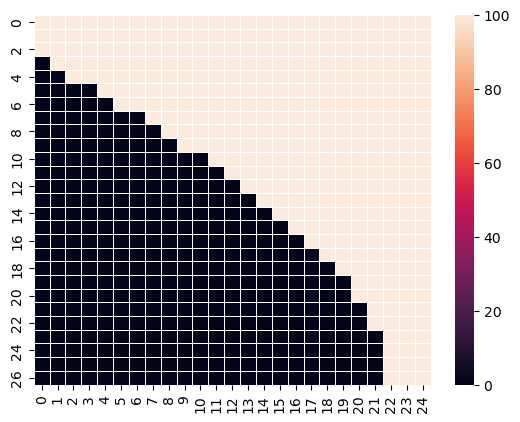

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

lut_np = np.array(get_lut)
ax = sns.heatmap(lut_np, linewidth=0.5)
plt.show()

<Axes: title={'center': 'mini lookup table draft'}>

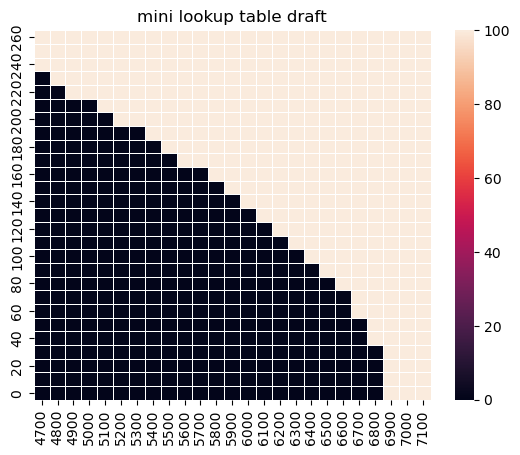

In [23]:
label_vel = [260 - i for i in range(0,261)]
#260 - i = v
#260-v = i
#row index: i = 260-v

label_height = [700 + j*30 for j in range(0,91)]
#700+20 j = h
#20 j = h - 700
#column index: j = (h-700)/20

lut_pd = pd.DataFrame(get_lut, index = label_vel, columns = label_height)
plt.title('mini lookup table draft')
plt.xlabel('height (m)')
plt.ylabel('velocity (m/s')
sns.heatmap(lut_pd, annot=False, linewidth=0.5)

In [114]:
#try first entry: height = 4700, vel = 260
%timeit print(get_extension(260.0,4700.0,TARGET_APOG))

curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
curr apogee w no extension = 7305.876945744813
curr apogee w 100% extension = 7304.200383381849
100
479 ms ± 84.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [76]:
mle.quit()

479 ms per call min
30129 s
8.4 hrs to generate whole table :( fun

In [2]:
import pickle
with open('lut_mini.pickle', 'rb') as f:
    x = pickle.load(f)

In [3]:
print(x)

[[100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 0, 0, 0, 0, 0, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100], [0, 0, 0, 0, 0, 0, 0,

In [5]:
print(len(x))

27


In [6]:
import csv
with open('mini_lut.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([])
    for row in x:
        writer.writerow(row)